<a href="https://colab.research.google.com/github/jeon-maker/Crowd_counting/blob/main/face_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the data

In [74]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 


# import useful tools|
from glob import glob
from PIL import Image
import cv2

# import data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs

from tqdm.auto import tqdm
import shutil as sh

# import data augmentation
import albumentations as albu


Face Count EDA


In [75]:
!ls ../input/count-the-number-of-faces-present-in-an-image/train


ls: cannot access '../input/count-the-number-of-faces-present-in-an-image/train': No such file or directory


In [76]:
# Setup the paths to train and test images
train=pd.read_csv('/content/drive/MyDrive/face counting/train/train.csv')
test=pd.read_csv('/content/drive/MyDrive/face counting/test.csv')

Images='/content/drive/MyDrive/face counting/train/image_data/'
# Glob the directories and get the lists of train and test images
img = glob(Images + '*')

In [ ]:
# 내가 만든 코드 
# 데이터 사용을 위함


In [77]:
# Compute at the number of images:
print('Total Number of images is {}'.format(len(img)))

Total Number of images is 8196


In [78]:
print('Number of image in train data are {}'.format(train.shape[0]))
train.head()

Number of image in train data are 5733


,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [79]:
print('Number of image in test data are {}'.format(test.shape[0]))
test.head()

Number of image in test data are 2463


,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg


In [80]:
bbox=pd.read_csv('/content/drive/MyDrive/face counting/train/bbox_train.csv')
bbox.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [81]:
# Merge all train images with the bounding boxes dataframe

train_images = train.merge(bbox, on='Name', how='left')

In [82]:
print(train_images.isnull().sum())
print(train_images.shape)
train_images

Name         0
HeadCount    0
width        0
height       0
xmin         0
ymin         0
xmax         0
ymax         0
dtype: int64
(24533, 8)


,Name,HeadCount,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,4,612,408,192,199,230,235
1,10001.jpg,4,612,408,247,168,291,211
2,10001.jpg,4,612,408,321,176,366,222
3,10001.jpg,4,612,408,355,183,387,214
4,10002.jpg,4,612,408,339,165,378,202
...,...,...,...,...,...,...,...,...
24528,18205.jpg,8,612,425,9,52,52,116
24529,18207.jpg,4,475,612,160,149,241,226
24530,18207.jpg,4,475,612,226,47,277,104
24531,18207.jpg,4,475,612,113,41,179,106


In [83]:
print(train_images.isnull().sum())
print(train_images.shape)
train_images

Name         0
HeadCount    0
width        0
height       0
xmin         0
ymin         0
xmax         0
ymax         0
dtype: int64
(24533, 8)


,Name,HeadCount,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,4,612,408,192,199,230,235
1,10001.jpg,4,612,408,247,168,291,211
2,10001.jpg,4,612,408,321,176,366,222
3,10001.jpg,4,612,408,355,183,387,214
4,10002.jpg,4,612,408,339,165,378,202
...,...,...,...,...,...,...,...,...
24528,18205.jpg,8,612,425,9,52,52,116
24529,18207.jpg,4,475,612,160,149,241,226
24530,18207.jpg,4,475,612,226,47,277,104
24531,18207.jpg,4,475,612,113,41,179,106


,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg
...,...
2458,18197.jpg
2459,18198.jpg
2460,18199.jpg
2461,18202.jpg


In [84]:
### Let's plot some image examples:

train_images.iloc[2].Name


'10001.jpg'

In [85]:
# First we store all the box dimensions.
def get_all_bboxes(df, image_id):
    image_bboxes = df[df.Name == image_id]
    
    bboxes = []
    for _,row in image_bboxes.iterrows():
        bboxes.append((row.xmin, row.ymin, row.xmax, row.ymax))
        
    return bboxes

# function for box representation on the image.

def plot_image_with_box(df, rows=3, cols=4, title='Face count images'):
    fig, axs = plt.subplots(rows, cols, figsize=(20,15))
    for row in range(rows):
        for col in range(cols):
            idx = np.random.randint(len(df), size=1)[0]
            img_id = df.iloc[idx].Name
            
            img = Image.open(Images + img_id)
            axs[row, col].imshow(img)

            bboxes = get_all_bboxes(df, img_id)
            
            for bbox in bboxes:
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='g',facecolor='none')
                axs[row, col].add_patch(rect)
            
            axs[row, col].axis('off')
            
    plt.suptitle(title)

AttributeError: ignored

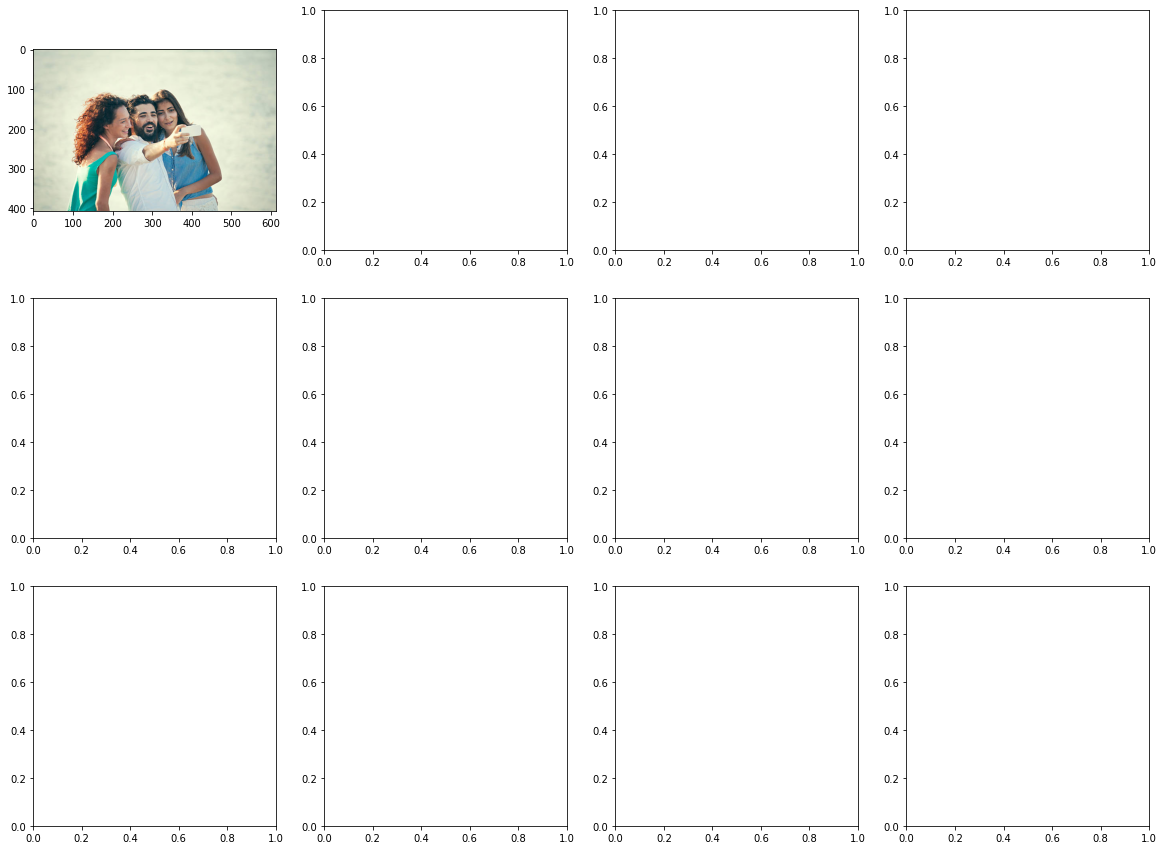

In [98]:
plot_image_with_box(test)

TypeError: ignored

In [35]:
train


,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4
...,...,...
5728,18201.jpg,2
5729,18203.jpg,3
5730,18204.jpg,5
5731,18205.jpg,8


In [37]:
# compute the number of bounding boxes per train image
train_images['count'] = train_images.loc[:,train_images.columns !='HeadCount'].apply(lambda row: 1 if np.isfinite(row.width) else 0, axis=1)


train_images_count = train_images.loc[:,train_images.columns !='HeadCount'].groupby('Name').sum().reset_index()

In [38]:
train_images_count['HeadCount']=train['HeadCount']
train_images_count.head()

,Name,width,height,xmin,ymin,xmax,ymax,count,HeadCount
0,10001.jpg,2448,1632,1115,726,1274,882,4,4
1,10002.jpg,2448,1632,1469,730,1611,870,4,4
2,10003.jpg,1224,766,257,17,647,393,2,2
3,10004.jpg,1836,1221,777,527,1110,851,3,3
4,10006.jpg,2448,1632,1015,686,1163,832,4,4


In [39]:
len(train_images_count.Name.unique())


5733

In [40]:
def hist_hover(dataframe, column, colors=["#94c8d8", "#ea5e51"], bins=30, title=''):
    hist, edges = np.histogram(dataframe[column], bins = bins)
    
    hist_df = pd.DataFrame({column: hist,
                             "left": edges[:-1],
                             "right": edges[1:]})
    hist_df["interval"] = ["%d to %d" % (left, right) for left, 
                           right in zip(hist_df["left"], hist_df["right"])]

    src = ColumnDataSource(hist_df)
    plot = figure(plot_height = 400, plot_width = 600,
          title = title,
          x_axis_label = 'Faces in image',
          y_axis_label = "Count")    
    plot.quad(bottom = 0, top = column,left = "left", 
        right = "right", source = src, fill_color = colors[0], 
        line_color = "#35838d", fill_alpha = 0.7,
        hover_fill_alpha = 0.7, hover_fill_color = colors[1])
    
    hover = HoverTool(tooltips = [('Interval', '@interval'),
                              ('Count', str("@" + column))])
    plot.add_tools(hover)
    
    output_notebook()
    show(plot)

In [41]:
hist_hover(train_images, 'HeadCount', title='Number of faces per image')


In [43]:
train_images.head()


,Name,HeadCount,width,height,xmin,ymin,xmax,ymax,count
0,10001.jpg,4,612,408,192,199,230,235,1
1,10001.jpg,4,612,408,247,168,291,211,1
2,10001.jpg,4,612,408,321,176,366,222,1
3,10001.jpg,4,612,408,355,183,387,214,1
4,10002.jpg,4,612,408,339,165,378,202,1


In [44]:
df=train_images
df.head()


,Name,HeadCount,width,height,xmin,ymin,xmax,ymax,count
0,10001.jpg,4,612,408,192,199,230,235,1
1,10001.jpg,4,612,408,247,168,291,211,1
2,10001.jpg,4,612,408,321,176,366,222,1
3,10001.jpg,4,612,408,355,183,387,214,1
4,10002.jpg,4,612,408,339,165,378,202,1


In [45]:
df['x_center'] = df['xmin'] + df['width']/2
df['y_center'] = df['ymin'] + df['height']/2
df['classes'] = 0


df['image_id']=df['Name'].str.replace('.jpg','')

df = df[['image_id','xmin', 'ymin', 'width', 'height','x_center','y_center','classes']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [46]:
df.head()


,image_id,xmin,ymin,width,height,x_center,y_center,classes
0,10001,192,199,612,408,498.0,403.0,0
1,10001,247,168,612,408,553.0,372.0,0
2,10001,321,176,612,408,627.0,380.0,0
3,10001,355,183,612,408,661.0,387.0,0
4,10002,339,165,612,408,645.0,369.0,0


YOLO 


In [47]:
from IPython.display import Image, clear_output  # to display images


In [48]:
# import required dependencies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm.auto import tqdm
import shutil as sh

import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
!git clone https://github.com/AIVenture0/yolov5.git


Cloning into 'yolov5'...
remote: Enumerating objects: 779, done.
remote: Total 779 (delta 0), reused 0 (delta 0), pack-reused 779
Receiving objects: 100% (779/779), 3.37 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (515/515), done.


In [50]:
# check for the cloned repo
!ls -R


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1335162.jpg  1924328.jpg  2569122.jpg  3085078.jpg  3758121.jpg  829882.jpg
1337073.jpg  1935747.jpg  2573608.jpg  3104224.jpg  3762111.jpg  839435.jpg
1342158.jpg  1940476.jpg  2575313.jpg  3111759.jpg  3766155.jpg  848112.jpg
134279.jpg   1940493.jpg  2578138.jpg  3114528.jpg  3766160.jpg  851577.jpg
1342819.jpg  195224.jpg   2582633.jpg  3116078.jpg  3768862.jpg  852158.jpg
1345323.jpg  1952470.jpg  2591889.jpg  311833.jpg   3784677.jpg  852777.jpg
134624.jpg   1959316.jpg  2597616.jpg  312270.jpg   3785249.jpg  85451.jpg
1346679.jpg  1960790.jpg  2601719.jpg  3127753.jpg  379507.jpg	 856260.jpg
1348201.jpg  1961275.jpg  2612020.jpg  3130170.jpg  3801808.jpg  865495.jpg
1350426.jpg  1961810.jpg  2614416.jpg  3131798.jpg  380597.jpg	 869064.jpg
1351113.jpg  1962114.jpg  2616124.jpg  3132106.jpg  3808030.jpg  879317.jpg
1351717.jpg  1965152.jpg  2618703.jpg  3133488.jpg  3808143.jpg  883844.jpg
1357045.jpg  196943.jpg   2623210.jpg  3148225.jpg  381

In [51]:
# move all the files of YOLOv5 to current working directory
!mv yolov5/* ./

In [52]:
# check for all the files in the current working directory
!ls


data	    drive	LICENSE    requirements.txt  train.py	     weights
detect.py   hubconf.py	models	   sample_data	     tutorial.ipynb  yolov5
Dockerfile  inference	README.md  test.py	     utils


In [53]:
!pip install -r requirements.txt


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-wtmvnl9u
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-wtmvnl9u
     |████████████████████████████████| 20.3 MB 83.5 MB/s 
     |████████████████████████████████| 596 kB 53.6 MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264348 sha256=beda9857d4733f9c671025b4e92aa77ae0be1197da1d96fe9ddace7689d6841f
  Stored in directory: /tmp/pip-ephem-wheel-cache-sk7bt573/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: pycocotools
    Found existing installation: p

In [55]:
# count
index = list(set(df.image_id))
len(index)

5733

Data Creation

To work with the yolo you need to frame your data in to a particular formate.Because that's how yolo is designed.

Formate

converter(main directory)
val2017
labels (contains all the box dimensions)
images (contains images)
train2017
labels
*images*

In [57]:
# code to transform the dataset.

source = 'train'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('convertor/fold{}/labels/'.format(fold)+path2save)
            with open('convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','width','height']].astype(float).values
                row = row/1024
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/content/drive/MyDrive/face counting/{}/image_data/{}.jpg".format(source,name),'convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/5733 [00:00<?, ?it/s]

In [59]:
print(os.listdir("/content/drive/MyDrive/face counting/train"))


['image_data', 'bbox_train.csv', 'train.csv']


In [60]:
# !ls ./convertor

!ls ./convertor/fold0/labels/train2017/12433.txt

ls: cannot access './convertor/fold0/labels/train2017/12433.txt': No such file or directory


AttributeError: ignored

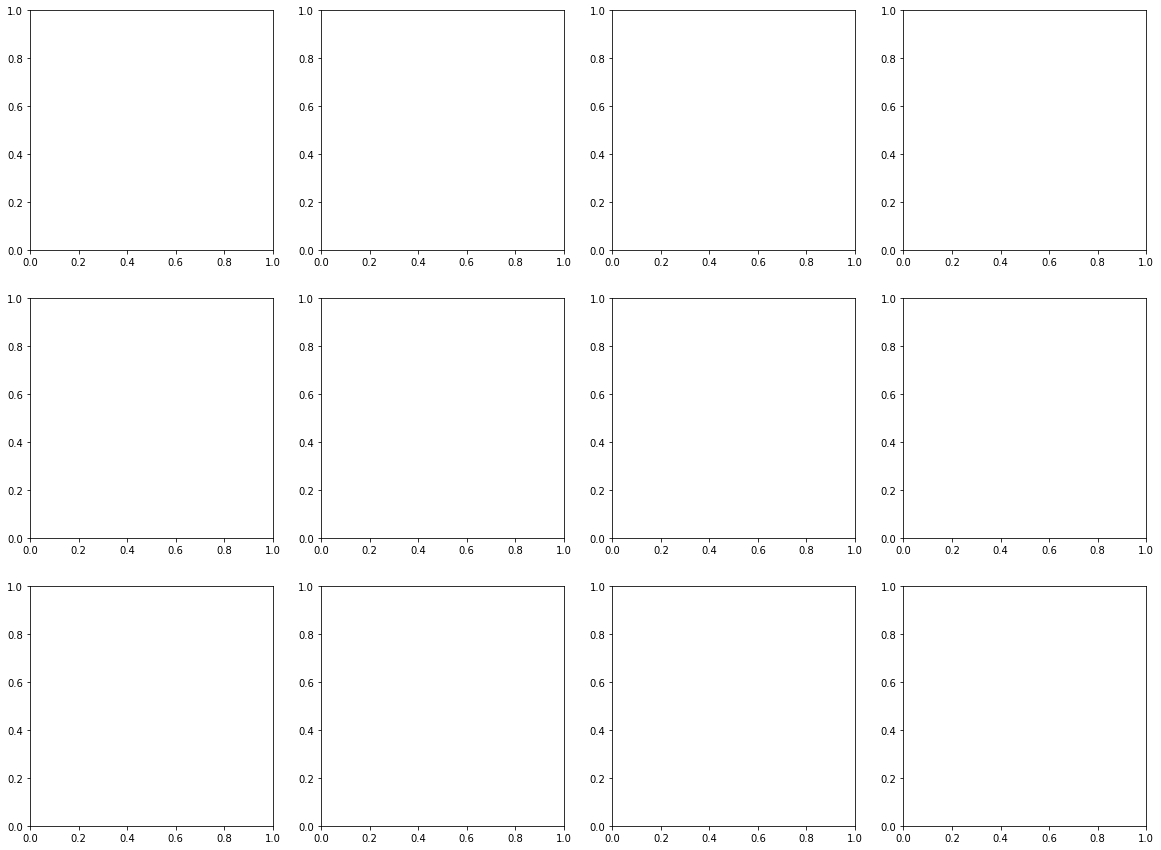

In [73]:
plot_image_with_box(train_images)
